<center><h2> Nanoparticle Toxicity Prediction/Classification
<center><h6> Krish Patel

In [5]:
#Source: https://www.kaggle.com/datasets/ucimachinelearning/nanoparticle-toxicity-dataset

#Description: This notebook, using 11 parameters, is meant to predict/classify whether or not a specific NP is toxic.

# Variables (n=11):
# - class (toxicity outcome) 
# - NPs (Specific Nanoparticle)
# - coresize (size of NP inner diameter)
# - hydrosize (hydrodynamic size)
# - surfcharge (surface charge of NP)
# - surfarea (surface area of NP)
# - Ec (charge of NP)
# - Expotime (time exposed)
# - Dosage (amount of material in use)
# - e (energy parameter)
# - NOxygen (number of oxygen atoms in NP)

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import skew, norm, probplot, boxcox, f_oneway

import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("nanotox_dataset.csv")

df['NPs'] = df['NPs'].map({'Al2O3': 1, 'CuO': 2, 'Fe2O3': 3, 'TiO2': 4, 'ZnO': 5})
df['class'] = df['class'].map({'nonToxic': 0, 'Toxic': 1})

df.rename(columns={"st": "Outcome", "X1": "Curr_Asset", "X2": "Initial_Goods", "X3": "Good_Depreciation", "X4": "EBITDA", "X5": "Inventory", "X6": "Net_Income", "X7": "Receivables", "X8": "Market_Cap",
                   "X9": "Net_Sales", "X10": "Total_Asset", "X11": "LT_Debt", "X12": "EBIT", "X13": "Profit", "X14": "Curr_Liability", "X15": "Retained_Earnings", 
                   "X16": "Total_Revenue", "X17": "Total_Liability", "X18": "Total_Operating"}, inplace=True)
df.shape

(881, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NPs         881 non-null    int64  
 1   coresize    881 non-null    float64
 2   hydrosize   881 non-null    float64
 3   surfcharge  881 non-null    float64
 4   surfarea    881 non-null    float64
 5   Ec          881 non-null    float64
 6   Expotime    881 non-null    int64  
 7   dosage      881 non-null    float64
 8   e           881 non-null    float64
 9   NOxygen     881 non-null    int64  
 10  class       881 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 75.8 KB


In [9]:
df.describe()

,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,4.476731,56.313280,513.781385,1.642111,42.074075,-4.018127,27.459705,39.651270,1.646050,1.308740,0.540295
std,0.940124,33.700297,346.601373,25.635780,47.111739,0.509806,19.534667,38.163289,0.089304,0.543581,0.498657
min,1.000000,7.500000,74.000000,-41.600000,7.000000,-5.170000,3.000000,0.000010,1.540000,1.000000,0.000000
25%,4.000000,32.000000,273.400000,-11.700000,15.000000,-4.160000,12.000000,10.000000,1.650000,1.000000,0.000000
50%,5.000000,45.300000,327.000000,-9.300000,24.100000,-3.890000,24.000000,25.000000,1.650000,1.000000,1.000000
75%,5.000000,86.000000,687.000000,29.400000,42.500000,-3.890000,24.000000,50.000000,1.650000,2.000000,1.000000
max,5.000000,125.000000,1843.000000,42.800000,210.000000,-1.510000,72.000000,300.000000,1.900000,3.000000,1.000000


In [10]:
max = df.max()
min = df.min()
range = max-min
print(range)

NPs              4.00000
coresize       117.50000
hydrosize     1769.00000
surfcharge      84.40000
surfarea       203.00000
Ec               3.66000
Expotime        69.00000
dosage         299.99999
e                0.36000
NOxygen          2.00000
class            1.00000
dtype: float64


In [11]:
df.corr()

,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class
NPs,1.000000,0.223131,0.061536,-0.109766,-0.252022,-0.044732,0.187419,0.000394,-0.096247,-0.599656,0.298335
coresize,0.223131,1.000000,-0.190664,-0.167297,-0.503805,0.102998,0.051480,-0.059103,0.107895,-0.337935,0.228585
hydrosize,0.061536,-0.190664,1.000000,0.078594,0.201893,0.002232,0.311230,-0.170649,-0.144270,0.105541,-0.024029
surfcharge,-0.109766,-0.167297,0.078594,1.000000,-0.100241,-0.054328,0.061050,-0.088180,0.514464,-0.249472,0.217722
surfarea,-0.252022,-0.503805,0.201893,-0.100241,1.000000,-0.043291,-0.171367,0.156898,-0.327070,0.520340,-0.372874
Ec,-0.044732,0.102998,0.002232,-0.054328,-0.043291,1.000000,0.090062,-0.099472,-0.505770,0.110432,-0.037868
Expotime,0.187419,0.051480,0.311230,0.061050,-0.171367,0.090062,1.000000,-0.149889,-0.028348,-0.189315,0.258999
dosage,0.000394,-0.059103,-0.170649,-0.088180,0.156898,-0.099472,-0.149889,1.000000,-0.065841,0.058779,0.189798
e,-0.096247,0.107895,-0.144270,0.514464,-0.327070,-0.505770,-0.028348,-0.065841,1.000000,-0.371863,0.369248
NOxygen,-0.599656,-0.337935,0.105541,-0.249472,0.520340,0.110432,-0.189315,0.058779,-0.371863,1.000000,-0.590946


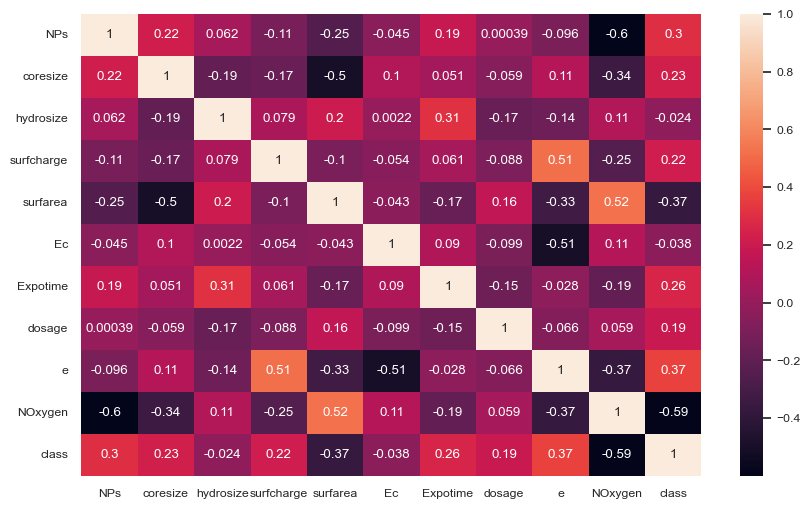

In [12]:
# Pearson's correlation (with heatmap)
plt.figure(figsize=(10,6))
sns.set(font_scale=0.8)
plt.rcParams["axes.labelsize"] = 0.5
sns.heatmap(df.corr(), annot=True);
plt.show()

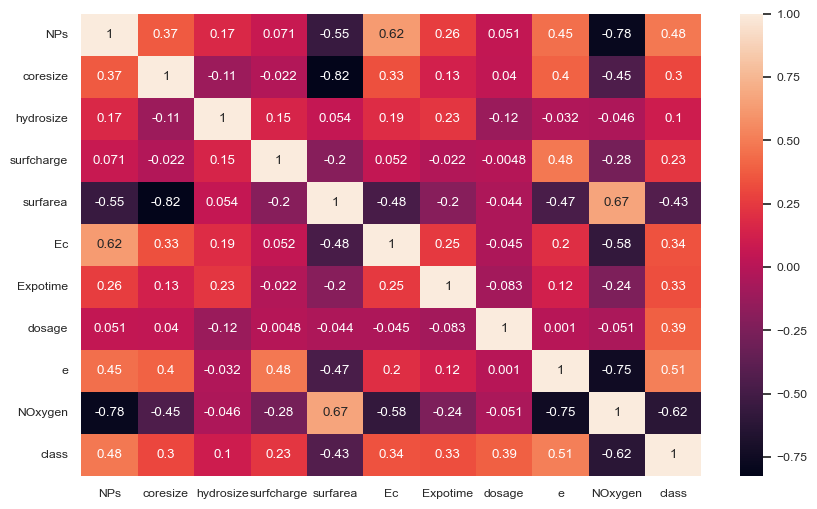

In [13]:
# Spearman's Rank or Spearman's Rho correlation

plt.figure(figsize=(10,6))
sns.set(font_scale=0.8)
plt.rcParams["axes.labelsize"] = 0.5
sns.heatmap(df.corr(method='spearman'), annot=True,); # nonparametric correlation
plt.show()

In [ ]:
# Phi K correlations for all variables

# ! pip install phik
import phik
from phik import resources, report

df.phik_matrix()

interval columns not set, guessing: ['NPs', 'coresize', 'hydrosize', 'surfcharge', 'surfarea', 'Ec', 'Expotime', 'dosage', 'e', 'NOxygen', 'class']


,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class
NPs,1.000000,0.628302,0.554569,0.589728,0.744037,0.886379,0.508904,0.228082,0.994450,0.940806,0.514077
coresize,0.628302,1.000000,0.909922,0.825549,0.808017,0.875219,0.595956,0.448317,0.694493,0.727514,0.677109
hydrosize,0.554569,0.909922,1.000000,0.779595,0.860923,0.812209,0.539676,0.409711,0.660359,0.553554,0.357587
surfcharge,0.589728,0.825549,0.779595,1.000000,0.818762,0.741530,0.526582,0.348845,0.726901,0.578225,0.362413
surfarea,0.744037,0.808017,0.860923,0.818762,1.000000,0.701876,0.387573,0.376001,0.751269,0.772113,0.482886
Ec,0.886379,0.875219,0.812209,0.741530,0.701876,1.000000,0.328946,0.314088,1.000000,0.823331,0.797575
Expotime,0.508904,0.595956,0.539676,0.526582,0.387573,0.328946,1.000000,0.207500,0.554796,0.349295,0.308322
dosage,0.228082,0.448317,0.409711,0.348845,0.376001,0.314088,0.207500,1.000000,0.263986,0.479184,0.526972
e,0.994450,0.694493,0.660359,0.726901,0.751269,1.000000,0.554796,0.263986,1.000000,1.000000,0.515731
NOxygen,0.940806,0.727514,0.553554,0.578225,0.772113,0.823331,0.349295,0.479184,1.000000,1.000000,0.395501


In [ ]:
from phik.report import plot_correlation_matrix
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define a custom colormap with lighter and darker versions of the extracted colors
custom_sea_green_cmap = mcolors.LinearSegmentedColormap.from_list(
    "CustomSeaGreen", ["black", "orange", "white"]
)

# Compute the Phi K matrix
phik_overview = df.phik_matrix()

# Presenting Phi K data as a heatmap with the custom sea green color theme
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map=custom_sea_green_cmap, 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(10, 9))
plt.tight_layout()
plt.show()

In [ ]:
sns.set(style="whitegrid")
ax = sns.countplot(data=df, x='class')

# Annotate the bars with counts and percentages
total = len(df['class'])
for p in ax.patches:
    count = p.get_height()
    percentage = '{:.1f}%'.format(100 * count / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, f'{count}\n{percentage}', ha='center', va='bottom')

plt.title('Count of Toxic Particles vs Non-Toxic Particles')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
# Outlier detection using boxplots (for all I/R variables)
plt.figure(figsize=(20,30))

for i, variable in enumerate(df): #enumerate is a built-in function in python that allows you to keep track of the number of iterations (loops) in a loop
                     plt.subplot(5,4,i+1) #provides a way to plot multiple plots on a single figure
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)
                    
plt.show()

In [ ]:
# Balancing data to ensure no bias

# Identify the indices of rows where Output = 0
index_to_delete = df[df['class'] == 1].sample(n=71, random_state=1).index

# Drop the identified rows
balanced_df = df.drop(index_to_delete)



sns.set(style="whitegrid")
ax = sns.countplot(data=balanced_df, x='class')

# Annotate the bars with counts and percentages
total = len(balanced_df['class'])
for p in ax.patches:
    count = p.get_height()
    percentage = '{:.1f}%'.format(100 * count / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, f'{count}\n{percentage}', ha='center', va='bottom')

plt.title('Count of class Variable in Balanced Dataset')
plt.xlabel('class')
plt.ylabel('Count')
plt.show()

In [ ]:
# Outlier detection using boxplots

plt.figure(figsize=(20,30))

for i, variable in enumerate(balanced_df):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(balanced_df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)
                    
plt.show()

In [ ]:
# Use flooring and capping method
def treat_outliers(df,col):
    Q1=df[col].quantile(0.25) 
    Q3=df[col].quantile(0.75) 
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)                                                            
    return df

def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df,c)
    return df


numerical_col = balanced_df.select_dtypes(include=np.number).columns.tolist()
balanced_df = treat_outliers_all(balanced_df, numerical_col)


plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(balanced_df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
import scipy.stats as stats
from scipy.stats import stats, norm, skew
import statsmodels.api as sm

# Make copy of data
data=balanced_df.copy()
data.info()

In [ ]:
X = data.drop('class',axis=1)    # Features
y = data['class'].astype('int64') # Labels
# making sure target data are integers

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

In [ ]:
#decision tree

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)


In [ ]:
model.fit(X_train, y_train)

In [ ]:
#  Function to calculate different metric scores - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    # Recall = minimizes false negatives
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    # Precision = minimizes false positives
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returns the list with train and test scores
    
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

<center><h2> Normal Decision Tree

In [ ]:
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

# Calculate metrics
get_metrics_score(d_tree)

# Create the confusion matrix
make_confusion_matrix(d_tree,y_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

column_names = list(data.columns)
column_names.remove('class')  # As this is the DV                
feature_names = column_names
print(feature_names)

plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
# Code below will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [ ]:

# Grid Search technique for hyperparameter tuning

from sklearn.model_selection import GridSearchCV


dtree_tuned = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

dtree_tuned = grid_obj.best_estimator_

dtree_tuned.fit(X_train, y_train)

<center><h2> Tuned Decision Tree

In [ ]:
get_metrics_score(dtree_tuned)

make_confusion_matrix(dtree_tuned,y_test)

<center><h2> Normal Random Forest

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Define a custom colormap with lighter and darker versions of the extracted colors
custom_sea_green_cmap = mcolors.LinearSegmentedColormap.from_list(
    "CustomSeaGreen", ["#D1EAE7", "#A3D3CD", "#388062", "#264D3F"]
)

# Fit the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

# Calculate metrics
get_metrics_score(rf_estimator)

# Function to make confusion matrix
def make_confusion_matrix(model, y_actual, X_test):
    y_predict = model.predict(X_test)
    cm = confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index=["Actual - No", "Actual - Yes"],
                         columns=["Predicted - No", "Predicted - Yes"])
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='', cmap=custom_sea_green_cmap, cbar=True)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()
    
    print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


# Create the confusion matrix
make_confusion_matrix(rf_estimator, y_test, X_test)



<center><h2> Normal Bagging Classifer

In [ ]:
# Libraries for different classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

# Libraries for model tuning and evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

# Fit the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

# Calculate metrics
get_metrics_score(bagging_classifier)

def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# Create the confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

<center><h2> Tuned Bagging Classifier

In [ ]:
%%time
bagging_tuned = BaggingClassifier(random_state=1)

parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_tuned = grid_obj.best_estimator_

bagging_tuned.fit(X_train, y_train)

In [ ]:
get_metrics_score(bagging_tuned)

def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
make_confusion_matrix(bagging_tuned,y_test)

In [ ]:
# Identify the models to compare
models = [d_tree, dtree_tuned, rf_estimator, bagging_classifier, bagging_tuned]

# Define empty lists to add results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# Function to calculate F1 score
def calculate_f1(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

# Loop through all identified models to get the metrics score (i.e., Accuracy, Recall, Precision, and F1)
for model in models:
    j = get_metrics_score(model, False)
    print(f"Metrics for model {model}: {j}")  # Debug print
    if len(j) != 6:
        raise ValueError(f"Expected 6 metrics, but got {len(j)} for model {model}.")
    
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    
    # Calculate F1 scores
    f1_train.append(calculate_f1(j[4], j[2]))
    f1_test.append(calculate_f1(j[5], j[3]))

comparison_frame = pd.DataFrame({
    'Model': ['Decision Tree', 'Tuned Decision Tree', 'Random Forest', 'Bagging Classifier', 'Tuned Bagging Classifier'], 
    'Train_Accuracy': acc_train,
    'Test_Accuracy': acc_test, 
    'Train_Recall': recall_train,
    'Test_Recall': recall_test,
    'Train_Precision': precision_train,
    'Test_Precision': precision_test,
    'F1_Train': f1_train, 
    'F1_Test': f1_test
})

# Sort models in decreasing order of test F1 score
comparison_frame.sort_values(by='F1_Test', ascending=False)